In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_excel("data/IPH_robos_2015_2020_tecmty (1).xlsx")
df2 = pd.read_excel("data/IPH_robos_2021_2024_tecmty_fechas_corregidas.xlsx")
df3 = pd.read_excel("data/IPH_robos_ene-ago-2025_tecmty.xlsx")

In [3]:
df3.isna().sum()

FOLIO        0
FECHA        0
HORA         0
MINUTO       0
TIPO         0
VOLENCIA     0
LATITUD      0
LONGITUD     0
DISTRITO     0
CUADRANTE    0
dtype: int64

In [4]:
# Del df3 cambiar el nombre de VOLENCIA por VIOLENCIA
df3 = df3.rename(columns={"VOLENCIA": "VIOLENCIA"})

In [5]:
# Eliminar la columna "DIA"
df2 = df2.drop(columns=["dia"])

In [6]:
# Juntar los dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)


In [7]:
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE
0,50848SP,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.622462,-106.099586,Diana,32
1,68587,2015-01-01,99,99,ROBO DE VEHICULO,SI,28.702297,-106.110216,Villa,17
2,68842X,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.685211,-106.027960,Morelos,45
3,61105X,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.617434,-106.094153,Zapata,68
4,77924,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.725298,-106.112998,Colón,13


In [8]:
# Quiero saber cuántas filas hay en total
print(f"Total de filas en el dataframe combinado: {df.shape[0]}")

Total de filas en el dataframe combinado: 35111


In [9]:
df.dtypes

FOLIO                object
FECHA        datetime64[ns]
HORA                  int64
MINUTO                int64
TIPO                 object
VIOLENCIA            object
LATITUD             float64
LONGITUD            float64
DISTRITO             object
CUADRANTE             int64
dtype: object

In [10]:
df.duplicated(subset=['FOLIO']).sum()

np.int64(866)

In [11]:
df.isna().sum()

FOLIO        0
FECHA        0
HORA         0
MINUTO       0
TIPO         0
VIOLENCIA    0
LATITUD      0
LONGITUD     0
DISTRITO     0
CUADRANTE    0
dtype: int64

In [12]:
# Que queden las nuevas columnas de año, mes y día sin decimales
df['AÑO'] = pd.DatetimeIndex(df['FECHA']).year
df['MES'] = pd.DatetimeIndex(df['FECHA']).month
df['DIA'] = pd.DatetimeIndex(df['FECHA']).day
df.head()


,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA
0,50848SP,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.622462,-106.099586,Diana,32,2015,1,1
1,68587,2015-01-01,99,99,ROBO DE VEHICULO,SI,28.702297,-106.110216,Villa,17,2015,1,1
2,68842X,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.685211,-106.027960,Morelos,45,2015,1,1
3,61105X,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.617434,-106.094153,Zapata,68,2015,1,1
4,77924,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.725298,-106.112998,Colón,13,2015,1,1


In [13]:
# Crear la columna NOMBRE_DIA con el nombre del día de la semana
df['NOMBRE_DIA'] = df['FECHA'].dt.day_name()
df.head()

,FOLIO,FECHA,HORA,MINUTO,TIPO,VIOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,AÑO,MES,DIA,NOMBRE_DIA
0,50848SP,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.622462,-106.099586,Diana,32,2015,1,1,Thursday
1,68587,2015-01-01,99,99,ROBO DE VEHICULO,SI,28.702297,-106.110216,Villa,17,2015,1,1,Thursday
2,68842X,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.685211,-106.027960,Morelos,45,2015,1,1,Thursday
3,61105X,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.617434,-106.094153,Zapata,68,2015,1,1,Thursday
4,77924,2015-01-01,99,99,ROBO A CASA HABITACION,NO,28.725298,-106.112998,Colón,13,2015,1,1,Thursday


In [14]:
df.groupby(['DISTRITO', 'TIPO']).size().unstack(fill_value=0)

TIPO,ROBO A CASA HABITACION,ROBO A NEGOCIO,ROBO DE VEHICULO
DISTRITO,,,
Colón,3909,2902,1184
Diana,1098,1501,549
Morelos,4441,2632,1232
Villa,2944,3736,1243
Zapata,2256,2448,976
Ángel,334,1328,398


In [15]:
cuadrante_counts = pd.DataFrame({'CUADRANTE': range(1, 79)})
cuadrante_counts.head()

,CUADRANTE
0,1
1,2
2,3
3,4
4,5


In [16]:
# Crear una columna nueva en cuadrante_counts con el conteo de robos por cuadrante llamada NUM_ROBOS
cuadrante_robos = df['CUADRANTE'].value_counts().reset_index()
cuadrante_robos.columns = ['CUADRANTE', 'NUM_ROBOS']

In [17]:
cuadrante_counts = cuadrante_counts.merge(cuadrante_robos, on='CUADRANTE', how='left')


In [18]:
cuadrante_counts

,CUADRANTE,NUM_ROBOS
0,1,136.0
1,2,3.0
2,3,715.0
3,4,362.0
4,5,8.0
...,...,...
73,74,443.0
74,75,524.0
75,76,283.0
76,77,718.0


In [19]:
# Elimina el decimal de NUM_ROBOS
cuadrante_counts['NUM_ROBOS'] = cuadrante_counts['NUM_ROBOS'].fillna(0).astype(int)

In [20]:
cuadrante_counts

,CUADRANTE,NUM_ROBOS
0,1,136
1,2,3
2,3,715
3,4,362
4,5,8
...,...,...
73,74,443
74,75,524
75,76,283
76,77,718


In [21]:
# Crear tablas por tipo: cuadrante_vehiculo, cuadrante_casa, cuadrante_negocio

# Dataframe base con todos los cuadrantes (1..78)
cuadrantes = pd.DataFrame({'CUADRANTE': range(1, 79)})
# Función auxiliar que cuenta robos por cuadrante según patrón en la columna TIPO
def tipo_counts(regex_pattern):
    mask = df['TIPO'].fillna('').astype(str).str.lower().str.contains(regex_pattern, regex=True)
    counts = df.loc[mask, 'CUADRANTE'].value_counts().reset_index()
    counts.columns = ['CUADRANTE', 'NUM_ROBOS']
    # Asegurar CUADRANTE entero (si acaso viene como float/str)
    counts['CUADRANTE'] = counts['CUADRANTE'].astype(int)
    # Merge con la lista completa de cuadrantes y rellenar ceros
    return cuadrantes.merge(counts, on='CUADRANTE', how='left').assign(NUM_ROBOS=lambda x: x['NUM_ROBOS'].fillna(0).astype(int))

# Patrones aproximados; ajústelos si los valores en TIPO son diferentes
cuadrante_vehiculo = tipo_counts(r'veh|auto|moto')
cuadrante_casa     = tipo_counts(r'casa|dom|hogar|vivi')
cuadrante_negocio  = tipo_counts(r'negocio|comer|tiend|local')

# Resumen rápido
print('Total robos (vehículo):', cuadrante_vehiculo['NUM_ROBOS'].sum())
print('Total robos (casa):',     cuadrante_casa['NUM_ROBOS'].sum())
print('Total robos (negocio):',  cuadrante_negocio['NUM_ROBOS'].sum())



Total robos (vehículo): 5582
Total robos (casa): 14982
Total robos (negocio): 14547


In [22]:
cuadrante_negocio.head()

,CUADRANTE,NUM_ROBOS
0,1,24
1,2,0
2,3,148
3,4,56
4,5,1


In [23]:
poblacion_cuadrante = pd.read_excel("data/poblacion cuadrantes.xlsx")
unidades_economicas_cuadrante = pd.read_excel("data/unidades economicas cuadrantes.xlsx")

In [24]:
# Cambia los nombres de poblacion_cuadrante a CUADRANTE y POBLACION
poblacion_cuadrante.columns = ['CUADRANTE', 'POBLACION']

In [25]:
# unir cuadrantes con poblacion_cuadrantes por la columna CUADRANTE

cuadrante_negocio = pd.merge(cuadrante_negocio, poblacion_cuadrante, on='CUADRANTE', how='left')
cuadrante_negocio.head()

,CUADRANTE,NUM_ROBOS,POBLACION
0,1,24,NaN
1,2,0,NaN
2,3,148,18838.0
3,4,56,20919.0
4,5,1,391.0


In [26]:
cuadrante_vehiculo = pd.merge(cuadrante_vehiculo, poblacion_cuadrante, on='CUADRANTE', how='left')
cuadrante_vehiculo.head()

,CUADRANTE,NUM_ROBOS,POBLACION
0,1,8,NaN
1,2,1,NaN
2,3,65,18838.0
3,4,56,20919.0
4,5,1,391.0


In [27]:
cuadrante_casa = pd.merge(cuadrante_casa, poblacion_cuadrante, on='CUADRANTE', how='left')
cuadrante_casa.head()

,CUADRANTE,NUM_ROBOS,POBLACION
0,1,104,NaN
1,2,2,NaN
2,3,502,18838.0
3,4,250,20919.0
4,5,6,391.0


In [28]:
# De los 3 cuadrantes creados anteriormente, los NAN susituimos por 0 en la columna de POBLACION
cuadrante_negocio['POBLACION'].fillna(0, inplace=True)
cuadrante_vehiculo['POBLACION'].fillna(0, inplace=True)
cuadrante_casa['POBLACION'].fillna(0, inplace=True)

/tmp/ipykernel_7409/3526651780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cuadrante_negocio['POBLACION'].fillna(0, inplace=True)
/tmp/ipykernel_7409/3526651780.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [29]:
cuadrante_negocio.head()

,CUADRANTE,NUM_ROBOS,POBLACION
0,1,24,0.0
1,2,0,0.0
2,3,148,18838.0
3,4,56,20919.0
4,5,1,391.0


In [30]:
# Quita el numero decimal en la columna de POBLACION
cuadrante_negocio['POBLACION'] = cuadrante_negocio['POBLACION'].astype(int)
cuadrante_vehiculo['POBLACION'] = cuadrante_vehiculo['POBLACION'].astype(int)
cuadrante_casa['POBLACION'] = cuadrante_casa['POBLACION'].astype(int)

In [31]:
cuadrante_negocio.head()

,CUADRANTE,NUM_ROBOS,POBLACION
0,1,24,0
1,2,0,0
2,3,148,18838
3,4,56,20919
4,5,1,391


In [32]:
import re


# Filtrar por tipo (ajuste patrones si hace falta)
df_vehiculo = df[df['TIPO'].fillna('').astype(str).str.lower().str.contains(r'veh|auto|moto', regex=True)]
df_casa     = df[df['TIPO'].fillna('').astype(str).str.lower().str.contains(r'casa|dom|hogar|vivi', regex=True)]
df_negocio  = df[df['TIPO'].fillna('').astype(str).str.lower().str.contains(r'negocio|comer|tiend|local', regex=True)]

def build_cuadrante_table(source_df):
    src = source_df.copy()
    # asegurar CUADRANTE numérico e int (descartar filas sin cuadrante válido)
    src['CUADRANTE'] = pd.to_numeric(src.get('CUADRANTE'), errors='coerce')
    src = src.dropna(subset=['CUADRANTE']).copy()
    src['CUADRANTE'] = src['CUADRANTE'].astype(int)

    # Determinar columna/valor de violencia:
    # 1) si existe columna 'VIOLENCIA' usarla
    # 2) si no, intentar extraer 'SI'/'NO' desde la columna 'TIPO'
    if 'VIOLENCIA' in src.columns:
        viol = src['VIOLENCIA'].fillna('').astype(str)
    else:
        # extraer la primera aparición de 'si' o 'no' como palabra en TIPO (case-insensitive)
        viol = src['TIPO'].fillna('').astype(str).str.extract(r'(?i)\b(si|no)\b', expand=False).fillna('')

    viol = viol.str.strip().str.upper()  # normalizar a 'SI' / 'NO' / ''
    src = src.assign(VIOL=viol)

    # Agregar conteos por cuadrante
    agg = src.groupby('CUADRANTE').agg(
        NUM_ROBOS = ('VIOL', 'size'),
        CON_VIOLENCIA = ('VIOL', lambda x: (x == 'SI').sum()),
        SIN_VIOLENCIA = ('VIOL', lambda x: (x == 'NO').sum())
    ).reset_index()

    # Merge con la lista completa de cuadrantes y rellenar ceros
    res = cuadrantes.merge(agg, on='CUADRANTE', how='left').fillna(0)
    res['NUM_ROBOS'] = res['NUM_ROBOS'].astype(int)
    res['CON_VIOLENCIA'] = res['CON_VIOLENCIA'].astype(int)
    res['SIN_VIOLENCIA'] = res['SIN_VIOLENCIA'].astype(int)
    return res

# Crear tablas finales
cuadrante_vehiculo = build_cuadrante_table(df_vehiculo)
cuadrante_casa     = build_cuadrante_table(df_casa)
cuadrante_negocio  = build_cuadrante_table(df_negocio)

# Resumen rápido
print('Vehículo — robos totales:', cuadrante_vehiculo['NUM_ROBOS'].sum(),
      ' con violencia:', cuadrante_vehiculo['CON_VIOLENCIA'].sum(),
      ' sin violencia:', cuadrante_vehiculo['SIN_VIOLENCIA'].sum())
print('Casa     — robos totales:', cuadrante_casa['NUM_ROBOS'].sum(),
      ' con violencia:', cuadrante_casa['CON_VIOLENCIA'].sum(),
      ' sin violencia:', cuadrante_casa['SIN_VIOLENCIA'].sum())
print('Negocio  — robos totales:', cuadrante_negocio['NUM_ROBOS'].sum(),
      ' con violencia:', cuadrante_negocio['CON_VIOLENCIA'].sum(),
      ' sin violencia:', cuadrante_negocio['SIN_VIOLENCIA'].sum())


Vehículo — robos totales: 5582  con violencia: 1283  sin violencia: 4299
Casa     — robos totales: 14982  con violencia: 343  sin violencia: 14639
Negocio  — robos totales: 14547  con violencia: 5431  sin violencia: 9116


In [33]:
cuadrante_negocio.head()

,CUADRANTE,NUM_ROBOS,CON_VIOLENCIA,SIN_VIOLENCIA
0,1,24,8,16
1,2,0,0,0
2,3,148,71,77
3,4,56,30,26
4,5,1,1,0


In [34]:
def add_month_columns(cuadrante_df, source_df):
    # Pivot: cuenta por CUADRANTE y MES
    pivot = source_df.groupby(['CUADRANTE', 'MES']).size().unstack(fill_value=0)
    # Asegurar columnas de 1 a 12
    for m in range(1, 13):
        if m not in pivot.columns:
            pivot[m] = 0
    pivot = pivot[sorted(pivot.columns)]
    # Renombrar columnas a MES_1 ... MES_12
    pivot.columns = [f'MES_{int(c)}' for c in pivot.columns]
    pivot = pivot.reset_index()
    # Merge con el dataframe de cuadrantes
    res = pd.merge(cuadrante_df, pivot, on='CUADRANTE', how='left')
    # Rellenar NaN y casteo a int
    mes_cols = [f'MES_{i}' for i in range(1, 13)]
    for col in mes_cols:
        if col not in res.columns:
            res[col] = 0
        res[col].fillna(0, inplace=True)
        res[col] = res[col].astype(int)
    return res

cuadrante_negocio = add_month_columns(cuadrante_negocio, df_negocio)
cuadrante_casa = add_month_columns(cuadrante_casa, df_casa)
cuadrante_vehiculo = add_month_columns(cuadrante_vehiculo, df_vehiculo)

/tmp/ipykernel_7409/1358272512.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  res[col].fillna(0, inplace=True)
/tmp/ipykernel_7409/1358272512.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [35]:
cuadrante_negocio.head()

,CUADRANTE,NUM_ROBOS,CON_VIOLENCIA,SIN_VIOLENCIA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12
0,1,24,8,16,2,2,1,5,0,4,1,5,0,3,0,1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,148,71,77,13,13,11,13,8,8,12,17,17,13,12,11
3,4,56,30,26,2,5,7,3,4,5,9,5,1,6,6,3
4,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
# Agregar nueva columna de TOTAL_ROBOS que sea el total de los 3 tipos de robos por cuadrante en cada uno de los dataframes
# (asegurar que las tablas por tipo tengan columna NUM_ROBOS)
def _ensure_num(col_df):
    if 'NUM_ROBOS' not in col_df.columns:
        # buscar nombres alternativos y asignar a NUM_ROBOS si existen
        for alt in ['TOTAL_ROBOS_VEHICULO', 'TOTAL_ROBOS_CASA', 'TOTAL_ROBOS_NEGOCIO']:
            if alt in col_df.columns:
                col_df['NUM_ROBOS'] = col_df[alt]
                break
    return col_df

cuadrante_vehiculo = _ensure_num(cuadrante_vehiculo)
cuadrante_casa     = _ensure_num(cuadrante_casa)
cuadrante_negocio  = _ensure_num(cuadrante_negocio)

# Construir tabla con los tres conteos por cuadrante
totales = cuadrantes[['CUADRANTE']].copy()
totales = totales.merge(cuadrante_vehiculo[['CUADRANTE','NUM_ROBOS']].rename(columns={'NUM_ROBOS':'ROBOS_VEHICULO'}),
                        on='CUADRANTE', how='left')
totales = totales.merge(cuadrante_casa[['CUADRANTE','NUM_ROBOS']].rename(columns={'NUM_ROBOS':'ROBOS_CASA'}),
                        on='CUADRANTE', how='left')
totales = totales.merge(cuadrante_negocio[['CUADRANTE','NUM_ROBOS']].rename(columns={'NUM_ROBOS':'ROBOS_NEGOCIO'}),
                        on='CUADRANTE', how='left')

# Rellenar NAs y convertir a int
for col in ['ROBOS_VEHICULO','ROBOS_CASA','ROBOS_NEGOCIO']:
    totales[col] = totales[col].fillna(0).astype(int)

# Total combinado
totales['TOTAL_ROBOS_TODOS_TIPOS'] = totales[['ROBOS_VEHICULO','ROBOS_CASA','ROBOS_NEGOCIO']].sum(axis=1)

# Agregar la columna TOTAL_ROBOS a cada dataframe tipo (misma cifra por cuadrante)
cuadrante_vehiculo = cuadrante_vehiculo.merge(totales[['CUADRANTE','TOTAL_ROBOS_TODOS_TIPOS']], on='CUADRANTE', how='left')
cuadrante_casa     = cuadrante_casa.merge(totales[['CUADRANTE','TOTAL_ROBOS_TODOS_TIPOS']], on='CUADRANTE', how='left')
cuadrante_negocio  = cuadrante_negocio.merge(totales[['CUADRANTE','TOTAL_ROBOS_TODOS_TIPOS']], on='CUADRANTE', how='left')

# Normalizar nombre de la nueva columna en cada dataframe
cuadrante_vehiculo['TOTAL_ROBOS'] = cuadrante_vehiculo['TOTAL_ROBOS_TODOS_TIPOS'].fillna(0).astype(int)
cuadrante_casa['TOTAL_ROBOS']     = cuadrante_casa['TOTAL_ROBOS_TODOS_TIPOS'].fillna(0).astype(int)
cuadrante_negocio['TOTAL_ROBOS']  = cuadrante_negocio['TOTAL_ROBOS_TODOS_TIPOS'].fillna(0).astype(int)

# Eliminar columna auxiliar
cuadrante_vehiculo.drop(columns=['TOTAL_ROBOS_TODOS_TIPOS'], inplace=True, errors='ignore')
cuadrante_casa.drop(columns=['TOTAL_ROBOS_TODOS_TIPOS'], inplace=True, errors='ignore')
cuadrante_negocio.drop(columns=['TOTAL_ROBOS_TODOS_TIPOS'], inplace=True, errors='ignore')


In [37]:
cuadrante_negocio.head()

,CUADRANTE,NUM_ROBOS,CON_VIOLENCIA,SIN_VIOLENCIA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12,TOTAL_ROBOS
0,1,24,8,16,2,2,1,5,0,4,1,5,0,3,0,1,136
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,3,148,71,77,13,13,11,13,8,8,12,17,17,13,12,11,715
3,4,56,30,26,2,5,7,3,4,5,9,5,1,6,6,3,362
4,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,8


In [38]:
# Agregar datos de población en cada dataframe tipo
poblacion_cuadrante = pd.read_excel("data/poblacion cuadrantes.xlsx")
poblacion_cuadrante.columns = ['CUADRANTE', 'POBLACION'] 
cuadrante_vehiculo = cuadrante_vehiculo.merge(poblacion_cuadrante, on='CUADRANTE', how='left')
cuadrante_casa = cuadrante_casa.merge(poblacion_cuadrante, on='CUADRANTE', how='left')
cuadrante_negocio = cuadrante_negocio.merge(poblacion_cuadrante, on='CUADRANTE', how='left')

In [39]:
cuadrante_negocio.head()

,CUADRANTE,NUM_ROBOS,CON_VIOLENCIA,SIN_VIOLENCIA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12,TOTAL_ROBOS,POBLACION
0,1,24,8,16,2,2,1,5,0,4,1,5,0,3,0,1,136,NaN
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,NaN
2,3,148,71,77,13,13,11,13,8,8,12,17,17,13,12,11,715,18838.0
3,4,56,30,26,2,5,7,3,4,5,9,5,1,6,6,3,362,20919.0
4,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,8,391.0


In [40]:
# De los 3 cuadrantes creados anteriormente, los NAN susituimos por 0 en la columna de POBLACION
cuadrante_negocio['POBLACION'].fillna(0, inplace=True)
cuadrante_vehiculo['POBLACION'].fillna(0, inplace=True)
cuadrante_casa['POBLACION'].fillna(0, inplace=True)

/tmp/ipykernel_7409/3526651780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cuadrante_negocio['POBLACION'].fillna(0, inplace=True)
/tmp/ipykernel_7409/3526651780.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [41]:
# Quita el numero decimal en la columna de POBLACION
cuadrante_negocio['POBLACION'] = cuadrante_negocio['POBLACION'].astype(int)
cuadrante_vehiculo['POBLACION'] = cuadrante_vehiculo['POBLACION'].astype(int)
cuadrante_casa['POBLACION'] = cuadrante_casa['POBLACION'].astype(int)

In [42]:
cuadrante_negocio.head()

,CUADRANTE,NUM_ROBOS,CON_VIOLENCIA,SIN_VIOLENCIA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12,TOTAL_ROBOS,POBLACION
0,1,24,8,16,2,2,1,5,0,4,1,5,0,3,0,1,136,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
2,3,148,71,77,13,13,11,13,8,8,12,17,17,13,12,11,715,18838
3,4,56,30,26,2,5,7,3,4,5,9,5,1,6,6,3,362,20919
4,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,8,391


In [43]:
# Calcular tasa de robos por cada 10,000 habitantes y guardarla en la columna '%_RB_1000_HAB'
# (se siguió la instrucción de nombre de columna aunque la tasa es por 10,000)
def _add_rb_per_10000(df):
    # evitar división por cero; si POBLACION==0 dejar 0
    df['RB_PER_10000_HAB'] = np.where(
        df.get('POBLACION', 0) > 0,
        (df['TOTAL_ROBOS'] / df['POBLACION'] * 10000).round(2),
        0.0
    )
    return df

cuadrante_vehiculo = _add_rb_per_10000(cuadrante_vehiculo)
cuadrante_casa     = _add_rb_per_10000(cuadrante_casa)
cuadrante_negocio  = _add_rb_per_10000(cuadrante_negocio)


In [44]:
cuadrante_negocio.head()

,CUADRANTE,NUM_ROBOS,CON_VIOLENCIA,SIN_VIOLENCIA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12,TOTAL_ROBOS,POBLACION,RB_PER_10000_HAB
0,1,24,8,16,2,2,1,5,0,4,1,5,0,3,0,1,136,0,0.00
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0.00
2,3,148,71,77,13,13,11,13,8,8,12,17,17,13,12,11,715,18838,379.55
3,4,56,30,26,2,5,7,3,4,5,9,5,1,6,6,3,362,20919,173.05
4,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,8,391,204.60


In [45]:
# Calcular RIESGO_RELATIVO: combina tasa (%_RB_1000_HAB), tendencia reciente (últimos 180d vs 180-360d) y violencia
def compute_riesgo_relativo(cuadrante_df, source_df, recent_days=180, weight_tasa=0.5, weight_trend=0.3, weight_viol=0.2):
    src = source_df.copy()
    src['FECHA'] = pd.to_datetime(src['FECHA'], errors='coerce')
    max_date = src['FECHA'].max()
    if pd.isna(max_date):
        # sin fechas válidas, asignar ceros
        cuadrante_df['TREND_180D'] = 0
        cuadrante_df['TREND_NORM'] = 0.0
        cuadrante_df['%_VIOLENCIA'] = 0.0
        cuadrante_df['RIESGO_RELATIVO'] = 0.0
        return cuadrante_df

    recent_start = max_date - pd.Timedelta(days=recent_days)
    prev_start = max_date - pd.Timedelta(days=2*recent_days)
    prev_end = recent_start - pd.Timedelta(days=1)

    # Conteos por periodo y cuadrante
    recent_counts = src.loc[src['FECHA'].between(recent_start, max_date)].groupby('CUADRANTE').size().rename('RECENTE')
    prev_counts = src.loc[src['FECHA'].between(prev_start, prev_end)].groupby('CUADRANTE').size().rename('PREV')

    trend_df = pd.DataFrame({'CUADRANTE': cuadrante_df['CUADRANTE']}).set_index('CUADRANTE')
    trend_df = trend_df.join(recent_counts).join(prev_counts)
    trend_df['RECENTE'] = trend_df['RECENTE'].fillna(0).astype(int)
    trend_df['PREV'] = trend_df['PREV'].fillna(0).astype(int)

    # Métrica de tendencia: (RECENTE - PREV) / (PREV + 1) para evitar division por cero
    trend_df['TREND_180D'] = (trend_df['RECENTE'] - trend_df['PREV']) / (trend_df['PREV'] + 1)
    # Normalizar tendencia 0..1 por min-max (si todos iguales, dejar 0)
    tmin, tmax = trend_df['TREND_180D'].min(), trend_df['TREND_180D'].max()
    if tmax > tmin:
        trend_df['TREND_NORM'] = (trend_df['TREND_180D'] - tmin) / (tmax - tmin)
    else:
        trend_df['TREND_NORM'] = 0.0

    # Violencia: porcentaje de robos con violencia en el dataframe de cuadrantes (usar columnas CON_VIOLENCIA y NUM_ROBOS)
    # Si no existen, intentar inferir a partir de datos origen (pero aquí usamos lo ya agregado)
    if 'CON_VIOLENCIA' in cuadrante_df.columns and 'NUM_ROBOS' in cuadrante_df.columns:
        viol_pct = cuadrante_df.apply(lambda r: (r['CON_VIOLENCIA'] / r['NUM_ROBOS']) if r['NUM_ROBOS'] > 0 else 0.0, axis=1)
    else:
        # fallback: 0 si no hay info
        viol_pct = pd.Series(0.0, index=cuadrante_df.index)

    # Tasa: usar columna 'RB_PER_10000_HAB' si existe (ya es escala relativa); normalizar por min-max
    tasa_col = 'RB_PER_10000_HAB'
    if tasa_col in cuadrante_df.columns:
        tasa_vals = cuadrante_df[tasa_col].astype(float).fillna(0.0)
    else:
        tasa_vals = pd.Series(0.0, index=cuadrante_df.index)

    # Normalizar tasa 0..1
    smin, smax = tasa_vals.min(), tasa_vals.max()
    if smax > smin:
        tasa_norm = (tasa_vals - smin) / (smax - smin)
    else:
        tasa_norm = pd.Series(0.0, index=cuadrante_df.index)

    # Combinar con pesos y escalar a 0-100
    trend_norm = trend_df['TREND_NORM'].reindex(cuadrante_df['CUADRANTE']).reset_index(drop=True)
    tasa_norm = tasa_norm.reset_index(drop=True)
    viol_pct = viol_pct.reset_index(drop=True)

    riesgo_raw = (weight_tasa * tasa_norm) + (weight_trend * trend_norm) + (weight_viol * viol_pct)
    riesgo_score = (riesgo_raw.fillna(0) * 100).round(2)

    # Asignar columnas al dataframe de cuadrante
    cuadrante_df = cuadrante_df.reset_index(drop=True)
    cuadrante_df['TREND_180D'] = trend_df['TREND_180D'].reindex(cuadrante_df['CUADRANTE']).values
    cuadrante_df['TREND_NORM'] = trend_df['TREND_NORM'].reindex(cuadrante_df['CUADRANTE']).values
    cuadrante_df['%_VIOLENCIA'] = (viol_pct * 100).round(2)
    cuadrante_df['RIESGO_RELATIVO'] = riesgo_score

    return cuadrante_df

# Aplicar a los tres dataframes (usar los dataframes fuente con FECHA: df_vehiculo, df_casa, df_negocio)
cuadrante_vehiculo = compute_riesgo_relativo(cuadrante_vehiculo, df_vehiculo)
cuadrante_casa     = compute_riesgo_relativo(cuadrante_casa, df_casa)
cuadrante_negocio  = compute_riesgo_relativo(cuadrante_negocio, df_negocio)


In [46]:
cuadrante_vehiculo.head()

,CUADRANTE,NUM_ROBOS,CON_VIOLENCIA,SIN_VIOLENCIA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,...,MES_10,MES_11,MES_12,TOTAL_ROBOS,POBLACION,RB_PER_10000_HAB,TREND_180D,TREND_NORM,%_VIOLENCIA,RIESGO_RELATIVO
0,1,8,3,5,0,0,1,0,2,0,...,0,1,1,136,0,0.00,-0.5,0.051724,37.50,9.05
1,2,1,0,1,0,0,0,0,0,0,...,0,0,0,3,0,0.00,0.0,0.137931,0.00,4.14
2,3,65,22,43,6,4,0,4,4,6,...,9,9,5,715,18838,379.55,0.0,0.137931,33.85,11.95
3,4,56,9,47,7,3,2,4,6,2,...,3,3,5,362,20919,173.05,0.0,0.137931,16.07,7.83
4,5,1,1,0,1,0,0,0,0,0,...,0,0,0,8,391,204.60,0.0,0.137931,100.00,24.70


In [47]:
# ---------- INICIO: Modelo predictivo mensual por cuadrante ----------

# modelado
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Asegurar FECHA y CUADRANTE
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df = df.dropna(subset=['FECHA', 'CUADRANTE']).copy()
df['CUADRANTE'] = df['CUADRANTE'].astype(int)

# Agrupar a nivel mensual (inicio de mes)
monthly = (df
           .groupby([pd.Grouper(key='FECHA', freq='MS'), 'CUADRANTE'])
           .size()
           .reset_index(name='COUNT'))

# Pivot para tener una serie por cuadrante
min_date = monthly['FECHA'].min()
max_date = monthly['FECHA'].max()
full_index = pd.date_range(start=min_date, end=max_date, freq='MS')
monthly_pivot = monthly.pivot(index='FECHA', columns='CUADRANTE', values='COUNT').reindex(full_index).fillna(0)
monthly_pivot.index.name = 'FECHA'

# Funciones auxiliares
def create_lag_features(series, lags=(1,2,3,6,12), rolls=(3,6)):
    df_x = pd.DataFrame({'y': series})
    for l in lags:
        df_x[f'lag_{l}'] = df_x['y'].shift(l)
    for r in rolls:
        df_x[f'roll_mean_{r}'] = df_x['y'].shift(1).rolling(window=r, min_periods=1).mean()
    df_x = df_x.dropna()
    X = df_x.drop(columns='y')
    y = df_x['y']
    return X, y

def train_and_forecast(series, n_forecast=3, random_state=42):
    # Entrena RF usando todas las observaciones disponibles (puedes cambiar a CV)
    X, y = create_lag_features(series)
    if len(y) < 10:
        # Poca data: devolver ceros o promedio
        last_date = series.index.max()
        future_idx = [last_date + pd.DateOffset(months=i+1) for i in range(n_forecast)]
        return pd.Series([series.mean()]*n_forecast, index=future_idx), {'mae': None, 'rmse': None}
    model = RandomForestRegressor(n_estimators=200, random_state=random_state)
    # Evaluación con TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=3)
    maes, rmses = [], []
    for train_idx, test_idx in tscv.split(X):
        model_cv = RandomForestRegressor(n_estimators=100, random_state=random_state)
        model_cv.fit(X.iloc[train_idx], y.iloc[train_idx])
        ypred = model_cv.predict(X.iloc[test_idx])
        maes.append(mean_absolute_error(y.iloc[test_idx], ypred))
        rmses.append(np.sqrt(mean_squared_error(y.iloc[test_idx], ypred)))
    # Reentrenar con todo
    model.fit(X, y)
    # Forecast iterativo
    history = series.copy().astype(float)
    preds = []
    for step in range(n_forecast):
        # crear features para el siguiente paso usando history
        lag_values = {}
        for l in (1,2,3,6,12):
            lag_values[f'lag_{l}'] = history.iloc[-l] if len(history) >= l else history.mean()
        for r in (3,6):
            lag_values[f'roll_mean_{r}'] = history.shift(1).rolling(window=r, min_periods=1).mean().iloc[-1]
        X_next = pd.DataFrame([lag_values])
        y_next = model.predict(X_next)[0]
        preds.append(max(0, y_next))  # no valores negativos
        # actualizar history con la predicción (para paso siguiente)
        next_date = history.index.max() + pd.DateOffset(months=1)
        history.loc[next_date] = y_next
    future_idx = [monthly_pivot.index.max() + pd.DateOffset(months=i+1) for i in range(n_forecast)]
    metrics = {'mae': np.mean(maes) if maes else None, 'rmse': np.mean(rmses) if rmses else None}
    return pd.Series(preds, index=future_idx), metrics

# Ejecutar por cada cuadrante y guardar resultados
n_forecast_months = 6  # cambiar aquí cuántos meses quieres predecir
results = {}
metrics_summary = []
for cu in sorted(monthly_pivot.columns.astype(int)):
    series = monthly_pivot[cu]
    preds, metrics = train_and_forecast(series, n_forecast=n_forecast_months)
    results[cu] = preds
    metrics_summary.append({'CUADRANTE': cu, 'MAE_cv': metrics['mae'], 'RMSE_cv': metrics['rmse']})

preds_df = pd.DataFrame(results)
preds_df.index.name = 'FECHA_PRED'
# Mostrar resumen de primeras filas y métricas
print("Predicciones (primeras columnas):")
display(preds_df.iloc[: , :6].round(2))
metrics_df = pd.DataFrame(metrics_summary).set_index('CUADRANTE')
print("\nMétricas por cuadrante (CV promedio):")
display(metrics_df.head(12))


# ---------- FIN: Modelo predictivo mensual por cuadrante ----------


Predicciones (primeras columnas):


,1,2,3,4,5,6
FECHA_PRED,,,,,,
2025-09-01,0.10,0.02,1.76,1.67,0.05,2.60
2025-10-01,0.13,0.02,2.52,1.36,0.05,3.07
2025-11-01,0.25,0.02,3.19,2.08,0.05,3.18
2025-12-01,0.04,0.02,1.82,1.50,0.05,3.04
2026-01-01,0.25,0.02,1.74,1.70,0.05,3.10
2026-02-01,0.13,0.02,3.80,1.96,0.05,3.53



Métricas por cuadrante (CV promedio):


,MAE_cv,RMSE_cv
CUADRANTE,,
1,0.532299,0.710270
2,0.044944,0.084559
3,2.796782,3.289697
4,1.558046,1.979210
5,0.183306,0.220995
6,2.901379,3.424115
7,3.466667,4.342512
8,4.669195,5.725148
9,3.081149,3.754962


In [48]:
# mostrar métricas generales
metrics_df.sort_values('MAE_cv').head()

,MAE_cv,RMSE_cv
CUADRANTE,,
2,0.044944,0.084559
5,0.183306,0.220995
64,0.295566,0.386350
43,0.392851,0.603257
1,0.532299,0.710270


In [49]:
# Top 10 cuadrantes con peor MAE y MAE relativo (MAE / media histórica)
means = monthly_pivot.mean()
md = metrics_df.copy()
md['MEAN_HIST'] = md.index.map(lambda cu: means.get(int(cu), 0))
md['MAE_rel'] = md['MAE_cv'] / md['MEAN_HIST'].replace(0, np.nan)
md.sort_values('MAE_rel', ascending=False).head(10)

,MAE_cv,RMSE_cv,MEAN_HIST,MAE_rel
CUADRANTE,,,,
5,0.183306,0.220995,0.062500,2.932900
64,0.295566,0.386350,0.132812,2.225436
2,0.044944,0.084559,0.023438,1.917623
44,0.813103,1.073763,0.492188,1.652018
62,0.771281,0.896212,0.500000,1.542562
42,0.580957,0.723477,0.421875,1.377084
43,0.392851,0.603257,0.296875,1.323289
66,0.963925,1.168274,0.742188,1.298762
58,0.613563,0.748767,0.507812,1.208246


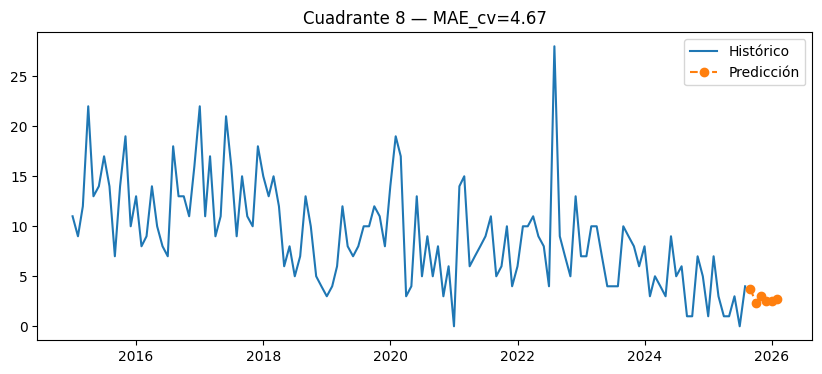

In [50]:
# Graficar histórico + predicción futura para un cuadrante 
cu = 8
hist = monthly_pivot[cu]
pred = preds_df[cu]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(hist.index, hist.values, label='Histórico')
plt.plot(pred.index, pred.values, marker='o', linestyle='--', label='Predicción')
plt.title(f'Cuadrante {cu} — MAE_cv={metrics_df.loc[cu,"MAE_cv"]:.2f}')
plt.legend(); plt.show()

In [57]:
# 1) Filtrar registros de tipo vehículo usando tu columna 'TIPO'
df_vehiculo_raw = df[df['TIPO'].fillna('').astype(str).str.lower().str.contains(r'veh|auto|moto', regex=True)].copy()

# 2) Agrupar a nivel mensual por CUADRANTE para obtener la cuenta de robos (CUENTA_ROBOS)
df_vehiculo = (
    df_vehiculo_raw.assign(FECHA = pd.to_datetime(df_vehiculo_raw['FECHA'], errors='coerce'))
    .dropna(subset=['FECHA', 'CUADRANTE'])
    .groupby([pd.Grouper(key='FECHA', freq='MS'), 'CUADRANTE'])
    .size()
    .reset_index(name='CUENTA_ROBOS')
)

# 3) Transformar objetivo y codificar cuadrante
df_vehiculo['TARGET'] = np.log1p(df_vehiculo['CUENTA_ROBOS'])   # target estabilizado
df_vehiculo['CUADRANTE_ID'] = df_vehiculo['CUADRANTE'].astype('category').cat.codes


In [58]:
# 1. Crear Lags (Valores pasados de la variable objetivo)
# 'Lags' comunes son 1, 3, 6, y 12 meses (para capturar la estacionalidad anual)
def create_lags(df, target_col, lags):
    for lag in lags:
        # Se agrupa por Cuadrante para que el lag solo se calcule dentro de ese Cuadrante
        df[f'Lag_{lag}M'] = df.groupby('CUADRANTE')[target_col].shift(lag)
    return df

df_vehiculo = create_lags(df_vehiculo, 'TARGET', [1, 3, 6, 12])

# 2. Agregar Estacionalidad
# El Mes es clave para la estacionalidad
df_vehiculo['MES'] = df_vehiculo['FECHA'].dt.month

# 3. Eliminar Nulos
# Las primeras 12 filas tendrán NaN debido a los lags, son necesarias para el entrenamiento
df_vehiculo.dropna(inplace=True) 

print(df_vehiculo.head(5))

         FECHA  CUADRANTE  CUENTA_ROBOS    TARGET  CUADRANTE_ID    Lag_1M  \
263 2016-03-01         31             1  0.693147            29  1.098612   
279 2016-04-01         25             1  0.693147            23  0.693147   
282 2016-04-01         31             2  1.098612            29  0.693147   
309 2016-07-01         31             1  0.693147            29  1.098612   
321 2016-08-01         25             2  1.098612            23  0.693147   

       Lag_3M    Lag_6M   Lag_12M  MES  
263  0.693147  1.098612  1.098612    3  
279  0.693147  0.693147  1.098612    4  
282  0.693147  1.098612  0.693147    4  
309  1.098612  1.098612  1.386294    7  
321  1.098612  0.693147  1.098612    8  


In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Variables
TARGET = 'TARGET'
FEATURES = ['Lag_1M', 'Lag_3M', 'Lag_6M', 'Lag_12M', 'MES', 'CUADRANTE_ID']
CUADRANTE_FEAT = ['CUADRANTE_ID'] # Para el input separado

# Escalar las features (EXCEPTO el CUADRANTE_ID)
scaler = MinMaxScaler()
df_vehiculo[FEATURES] = scaler.fit_transform(df_vehiculo[FEATURES])

# Dividir por tiempo (el futuro es el test/validación)
TRAIN_END_DATE = '2024-01-01'
df_train = df_vehiculo[df_vehiculo['FECHA'] < TRAIN_END_DATE]
df_test = df_vehiculo[df_vehiculo['FECHA'] >= TRAIN_END_DATE]

# Asignar X (Features) y y (Target)
X_train_ts = df_train[FEATURES].drop(columns=CUADRANTE_FEAT).values
X_train_q = df_train[CUADRANTE_FEAT].values
y_train = df_train[TARGET].values

X_test_ts = df_test[FEATURES].drop(columns=CUADRANTE_FEAT).values
X_test_q = df_test[CUADRANTE_FEAT].values
y_test = df_test[TARGET].values

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Concatenate, Flatten

# Parámetros del modelo
MAX_CUADRANTE_ID = df_vehiculo['CUADRANTE_ID'].nunique()
EMBEDDING_DIM = 2 # Dimensión de la representación del cuadrante
N_LAGS = 4        # Número de features temporales (Lag_1M, 3M, 6M, 12M)

# 1. Definir el Input Temporal (LSTM)
Input_TS = Input(shape=(N_LAGS,), name='Input_Series')
# La LSTM necesita 3D, añadimos una dimensión de "pasos de tiempo" (timesteps)
X_TS = tf.expand_dims(Input_TS, axis=1) 
X_TS = LSTM(units=32, activation='tanh')(X_TS)

# 2. Definir el Input Categórico (Embedding para Cuadrante)
Input_Q = Input(shape=(1,), name='Input_Cuadrante')
# El Embedding aprende un vector para cada cuadrante
X_Q = Embedding(input_dim=MAX_CUADRANTE_ID, output_dim=EMBEDDING_DIM, input_length=1)(Input_Q)
X_Q = Flatten()(X_Q)

# 3. Concatenar y Predecir
X = Concatenate()([X_TS, X_Q])
X = Dense(16, activation='relu')(X)
Output = Dense(1, activation='linear', name='Output_Robos')(X)

model_vehiculo = Model(inputs=[Input_TS, Input_Q], outputs=Output)

# Compilar el modelo
model_vehiculo.compile(optimizer='adam', loss='mae', metrics=['mse'])

# Entrenar el modelo
history = model_vehiculo.fit(
    [X_train_ts, X_train_q], y_train,
    epochs=50,
    batch_size=32,
    validation_data=([X_test_ts, X_test_q], y_test),
    verbose=0
)

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [63]:
# ...existing code...
import tensorflow as tf
from tensorflow.keras import layers, Model, callbacks, optimizers

# Parámetros
MAX_CUADRANTE_ID = df_vehiculo['CUADRANTE_ID'].nunique()   # número de IDs únicos
EMBEDDING_DIM = 4   # ajustar si quieres más representación
INPUT_TS_DIM = X_train_ts.shape[1]  # p. ej. 5 (lags + mes)

# Input tabular (lags, mes, etc.)
inp_ts = layers.Input(shape=(INPUT_TS_DIM,), name='Input_Tabular')
x = layers.Dense(64, activation='relu')(inp_ts)
x = layers.Dense(32, activation='relu')(x)

# Input categórico (cuadrante) con embedding
inp_q = layers.Input(shape=(1,), dtype='int32', name='Input_Cuadrante')
q = layers.Embedding(input_dim=MAX_CUADRANTE_ID+1, output_dim=EMBEDDING_DIM, input_length=1)(inp_q)
q = layers.Flatten()(q)

# Concatenar y salida
h = layers.Concatenate()([x, q])
h = layers.Dense(32, activation='relu')(h)
out = layers.Dense(1, activation='linear', name='Output_Robos')(h)

model_vehiculo = Model([inp_ts, inp_q], out)
model_vehiculo.compile(optimizer=optimizers.Adam(1e-3), loss='mae', metrics=['mse'])

# Callbacks y entrenamiento
es = callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
history = model_vehiculo.fit(
    [X_train_ts, X_train_q], y_train,
    validation_data=([X_test_ts, X_test_q], y_test),
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

# Predicción e inverse transform (log1p -> expm1)
preds_log = model_vehiculo.predict([X_test_ts, X_test_q])
preds_counts = np.expm1(preds_log.squeeze())
# ...existing code...

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4679 - mse: 0.3559 - val_loss: 0.2170 - val_mse: 0.0923
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2734 - mse: 0.1304 - val_loss: 0.2092 - val_mse: 0.0790
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2672 - mse: 0.1279 - val_loss: 0.2042 - val_mse: 0.0776
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2653 - mse: 0.1285 - val_loss: 0.2048 - val_mse: 0.0799
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2630 - mse: 0.1309 - val_loss: 0.1988 - val_mse: 0.0793
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2635 - mse: 0.1297 - val_loss: 0.1971 - val_mse: 0.0806
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2632 - mse: 0.1290 - val_loss: 0.2038 - val_mse: 0.0799
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2641 - mse: 0.1290 - val_loss: 0.1999 - val_mse: 0.0807
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.262

In [65]:
# ...existing code...
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# shapes y resumen del modelo
print("X_train_ts.shape:", X_train_ts.shape, "X_train_q.shape:", X_train_q.shape)
print(model_vehiculo.summary())

# evaluación en escala log1p
eval_log = model_vehiculo.evaluate([X_test_ts, X_test_q], y_test, verbose=0)
print("Eval (loss MAE log1p, mse log1p):", eval_log)

# predicciones y métricas en escala original (robos)
preds_log = model_vehiculo.predict([X_test_ts, X_test_q])
preds_counts = np.expm1(preds_log.squeeze())
y_test_counts = np.expm1(y_test)

print("MAE (cuentas):", mean_absolute_error(y_test_counts, preds_counts))
print("RMSE (cuentas):", np.sqrt(mean_squared_error(y_test_counts, preds_counts)))

# Mostrar primeras filas comparadas
comp = pd.DataFrame({
    "y_true_counts": y_test_counts,
    "y_pred_counts": preds_counts
})
display(comp.head(10))
# ...existing code...

X_train_ts.shape: (2010, 5) X_train_q.shape: (2010, 1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_Tabular       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input_Cuadrante     │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │        384 │ Input_Tabular[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 4)      │        280 │ Input_Cuadrante[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 4)         │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 36)        │          0 │ dense_3[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      1,184 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output_Robos        │ (None, 1)         │         33 │ dense_4[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,885 (46.43 KB)

 Trainable params: 3,961 (15.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,924 (30.96 KB)

None
Eval (loss MAE log1p, mse log1p): [0.19420382380485535, 0.07914876192808151]
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
MAE (cuentas): 0.529258336650204
RMSE (cuentas): 0.8919855670967443


,y_true_counts,y_pred_counts
0,2.0,1.025798
1,5.0,1.939097
2,3.0,2.093820
3,1.0,1.512742
4,2.0,1.378863
5,1.0,2.594103
6,1.0,1.351478
7,4.0,1.150836
8,2.0,1.150836
9,3.0,1.251083
